Shaffan Ahmed- MSCS-634-M40- Lab1

In [15]:
import pandas as pd
data = 'Education_Costs.csv'
df = pd.read_csv(data)
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


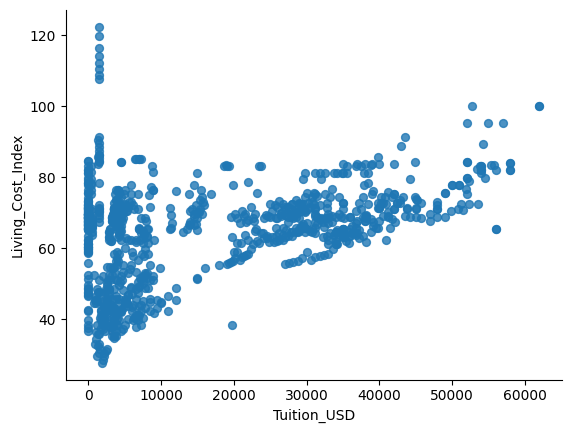

In [17]:
# @title Tuition_USD vs Living_Cost_Index

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Tuition_USD', y='Living_Cost_Index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

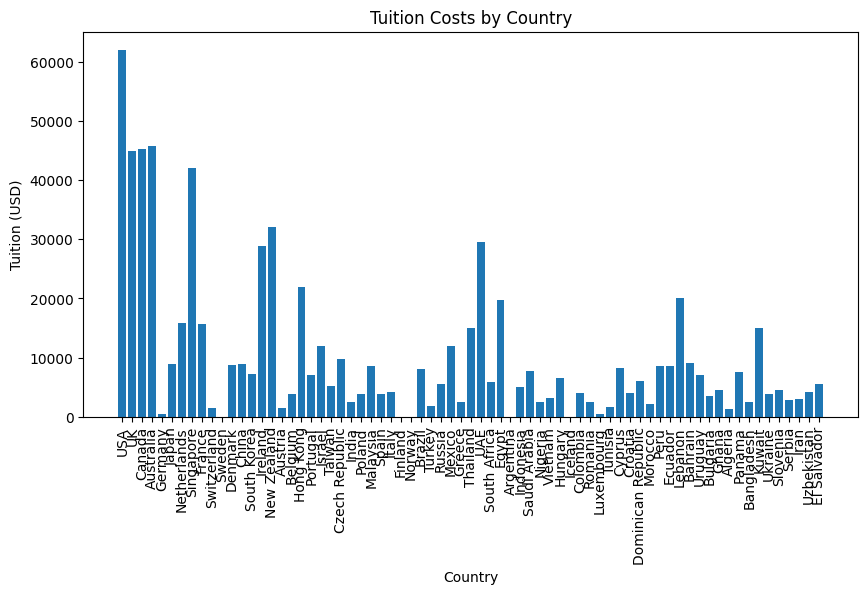

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df['Country'], df['Tuition_USD'])
plt.xlabel('Country')
plt.ylabel('Tuition (USD)')
plt.title('Tuition Costs by Country')
plt.xticks(rotation=90)
plt.show()

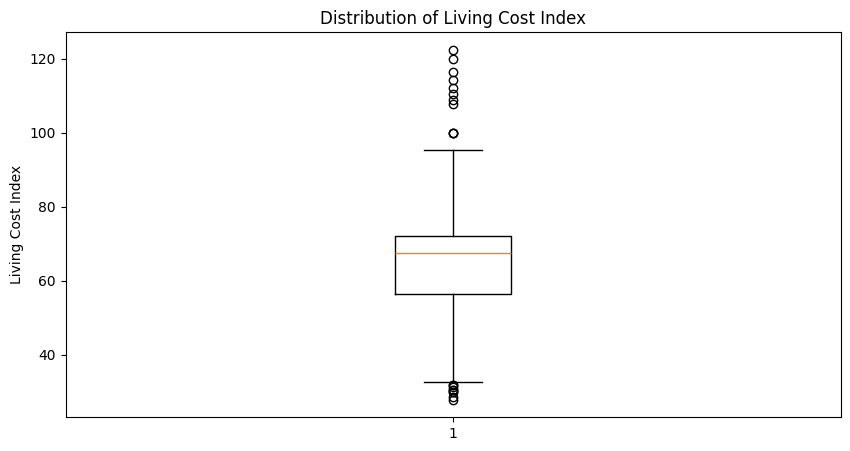

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.boxplot(df['Living_Cost_Index'])
plt.ylabel('Living Cost Index')
plt.title('Distribution of Living Cost Index')
plt.show()

In [21]:
df.isnull().sum()

,0
Country,0
City,0
University,0
Program,0
Level,0
Duration_Years,0
Tuition_USD,0
Living_Cost_Index,0
Rent_USD,0
Visa_Fee_USD,0


In [23]:
df.isnull().sum()
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [25]:
Q1 = df['Tuition_USD'].quantile(0.25)
Q3 = df['Tuition_USD'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Tuition_USD'] < (Q1 - 1.5 * IQR)) | (df['Tuition_USD'] > (Q3 + 1.5 * IQR))]
df = df[~((df['Tuition_USD'] < (Q1 - 1.5 * IQR)) | (df['Tuition_USD'] > (Q3 + 1.5 * IQR)))]

In [27]:
Q1 = df['Tuition_USD'].quantile(0.25)
Q3 = df['Tuition_USD'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Tuition_USD'] < (Q1 - 1.5 * IQR)) | (df['Tuition_USD'] > (Q3 + 1.5 * IQR))]
df = df[~((df['Tuition_USD'] < (Q1 - 1.5 * IQR)) | (df['Tuition_USD'] > (Q3 + 1.5 * IQR)))]
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [28]:
df_sampled = df.sample(frac=0.5)

In [30]:
df_sampled = df.sample(frac=0.5)
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Tuition_USD_Scaled'] = scaler.fit_transform(df[['Tuition_USD']])

In [32]:
df['Living_Cost_Category'] = pd.qcut(df['Living_Cost_Index'], q=3, labels=['Low', 'Medium', 'High'])

In [33]:
df['Living_Cost_Category'] = pd.qcut(df['Living_Cost_Index'], q=3, labels=['Low', 'Medium', 'High'])
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Tuition_USD_Scaled,Living_Cost_Category
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,0.893548,High
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,0.664516,High
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,0.620968,High
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52,0.677419,High
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92,0.008065,Medium


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Country               907 non-null    object  
 1   City                  907 non-null    object  
 2   University            907 non-null    object  
 3   Program               907 non-null    object  
 4   Level                 907 non-null    object  
 5   Duration_Years        907 non-null    float64 
 6   Tuition_USD           907 non-null    int64   
 7   Living_Cost_Index     907 non-null    float64 
 8   Rent_USD              907 non-null    int64   
 9   Visa_Fee_USD          907 non-null    int64   
 10  Insurance_USD         907 non-null    int64   
 11  Exchange_Rate         907 non-null    float64 
 12  Tuition_USD_Scaled    907 non-null    float64 
 13  Living_Cost_Category  907 non-null    category
dtypes: category(1), float64(4), int64(4), object(5)
memory usa

In [35]:
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Tuition_USD_Scaled
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695,0.269436
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134,0.267458
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000,0.000000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000,0.045968
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000,0.120968
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000,0.501613
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000,1.000000


In [36]:
print("Min:", df['Tuition_USD'].min())
print("Max:", df['Tuition_USD'].max())
print("Mean:", df['Tuition_USD'].mean())
print("Median:", df['Tuition_USD'].median())
print("Mode:", df['Tuition_USD'].mode()[0])

Min: 0
Max: 62000
Mean: 16705.016538037486
Median: 7500.0
Mode: 0


In [37]:
print("Range:", df['Tuition_USD'].max() - df['Tuition_USD'].min())
print("Quartiles:", df['Tuition_USD'].quantile([0.25, 0.5, 0.75]))
print("IQR:", IQR)
print("Variance:", df['Tuition_USD'].var())
print("Std Dev:", df['Tuition_USD'].std())

Range: 62000
Quartiles: 0.25     2850.0
0.50     7500.0
0.75    31100.0
Name: Tuition_USD, dtype: float64
IQR: 28250.0
Variance: 274975501.40701044
Std Dev: 16582.385274953976


In [41]:
import pandas as pd

# Load your dataset (already done in your notebook)
data = "Education_Costs.csv"
df = pd.read_csv(data)

# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                   Duration_Years  Tuition_USD  Living_Cost_Index  Rent_USD  \
Duration_Years           1.000000     0.140232          -0.068300  0.051565   
Tuition_USD              0.140232     1.000000           0.396830  0.724445   
Living_Cost_Index       -0.068300     0.396830           1.000000  0.811128   
Rent_USD                 0.051565     0.724445           0.811128  1.000000   
Visa_Fee_USD             0.017424     0.522490           0.256820  0.374079   
Insurance_USD            0.065670     0.582407           0.754393  0.776770   
Exchange_Rate            0.020097    -0.116710          -0.198685 -0.193944   

                   Visa_Fee_USD  Insurance_USD  Exchange_Rate  
Duration_Years         0.017424       0.065670       0.020097  
Tuition_USD            0.522490       0.582407      -0.116710  
Living_Cost_Index      0.256820       0.754393      -0.198685  
Rent_USD               0.374079       0.776770      -0.193944  
Visa_Fee_USD           1.000000       0.129655 